In [1]:
import shutil
import os
import torch
import pickle, easydict

# if mp.get_start_method(allow_none=True) != 'spawn':
#     mp.set_start_method('spawn')
from core.config import Config_Hulk as Config
from core.solvers import solver_entry
# %pip install pip easydict timm json_tricks xtcocotools pycocotools dict_recursive_update scikit-learn numpy

ceph can not be used
ATTENTION_MODE: math


In [2]:
# set config path
# config_path = '/dscilab_dungvo/workspace/BA-PRE_THESIS/my_source/OpenGVBackbone/PATH/experiments/L2_full_setting_joint_v100_32g/v100_32g_vitbase_size224.yaml'
config_path = "/dscilab_dungvo/workspace/BA-PRE_THESIS/my_source/OpenGVBackbone/Hulk/experiments/release/Hulk_vit-B.yaml"
C = Config(config_path)

# Disable parameter for folder path

# if not os.path.exists("./temp"):
#     os.makedirs("./temp")
# pickle.dump(
#     easydict.EasyDict({"image_name": "temp", "label": "temp", "partition": {"test": "temp"}}),
#     open("./temp/temp.pkl", "wb"),
# )
# C.config["common"]["dataset"]["kwargs"]["task_spec"]["data_path"] = "./temp/temp.pkl"
# C.config["common"]["dataset"]["kwargs"]["task_spec"]["root_path"] = "./"
C.config["expname"] = "TEMP_EXPERIMENT"

# Disable parameter for slurm
C.ginfo.neck_share_group = None
C.ginfo.group = None
C.ginfo.decoder_share_group = None

# # Set pretrained model path
# C.config["common"]["backbone"]["kwargs"][
#     "pretrain_path"
# ] = '/dscilab_dungvo/workspace/BA-PRE_THESIS/my_source/OpenGVBackbone/Hulk/hulk_checkpoint/Pretrain/ckpt_task5_iter_newest.pth.tar'
C.config["tasks"][5]['backbone']['kwargs']['pretrained'] = False
C.config["tasks"][5]['patch_adapter']['kwargs']['pretrained'] = False
C.config["tasks"][5]['label_adapter']['kwargs']['pretrained'] = False

S = solver_entry(C)
# S.config.dataset.train=False
# pseudo_dataset = S.create_dataset()
# transform = pseudo_dataset.transform


[2024-09-20 02:38:11,099][           solver.py][line:  88][    INFO] auto_denan disabled!
[2024-09-20 02:38:11,103][     solver_deter.py][line:  58][    INFO] deterministic mode, seed: 233, worker_rank: True,                                   cudnn_deterministic: False


backbone of task5 has been overided to {'type': 'vit_base_patch16_mask', 'kwargs': {'task_sp_list': ['rel_pos_h', 'rel_pos_w'], 'pretrained': True, 'lms_checkpoint_train': 'fairscale', 'window': False, 'test_pos_mode': False, 'learnable_pos': True, 'drop_path_rate': 0.2, 'img_size': 1344, 'num_encoded_tokens': 192, 'vis_patch_token_ratio': 1, 'vis_label_token_ratio': 0.0}}
decoder of task5 has been overided to {'type': 'UniHCPv2_Head', 'kwargs': {'predictor': 'hulk', 'task': 'recons', 'modality_share_list': ['predictor.mask_token'], 'task_sp_list': ['predictor.query_embed_patch', 'predictor.query_embed_label', 'predictor.class_embed', 'predictor.fc_bias'], 'loss_weight': 1.0, 'transformer_predictor_cfg': {'hidden_dim': 256, 'num_queries': 20, 'nheads': 8, 'dim_feedforward': 2048, 'dec_layers': 9, 'pre_norm': False, 'arch': 'fan_in', 'enforce_input_project': False, 'mask_on': False, 'num_feature_levels': 1, 'cross_pos_embed': 'anchor', 'self_attn_mask_type': 'patch_diag_label_row', 'cls

In [3]:
model = S.create_model().cuda()

[Rank 0] fairscale checkpoint success


/dscilab_dungvo/workspace/BA-PRE_THESIS/my_source/OpenGVBackbone/Hulk/core/models/input_adapter/text_adapter.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  text_vector

Number of conv/bn params: 0.00M
Number of linear params: 85.02M
Position interpolate from (14, 14) to [16, 12]


/dscilab_dungvo/workspace/BA-PRE_THESIS/my_source/OpenGVBackbone/Hulk/core/models/output_projector/text_projector.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  text_v

add param pos_embed as task_specific
add param proj.weight as rgb_specific
add param proj.bias as rgb_specific
add param type_embed.weight as rgb_specific
add param text_vectors as task_specific
add param output_proj.weight as rgb_specific
add param output_proj.bias as rgb_specific
add param text_vectors as task_specific
add param patch_proj.weight as text_specific
add param class_proj.weight as text_specific
add param post_mul_norm.weight as task_specific
add param post_mul_norm.bias as task_specific
add param global_tokens as backbone_specific
add param blocks.0.norm1.weight as backbone_specific
add param blocks.0.norm1.bias as backbone_specific
add param blocks.0.attn.qkv.weight as backbone_specific
add param blocks.0.attn.qkv.bias as backbone_specific
add param blocks.0.attn.proj.weight as backbone_specific
add param blocks.0.attn.proj.bias as backbone_specific
add param blocks.0.norm2.weight as backbone_specific
add param blocks.0.norm2.bias as backbone_specific
add param blocks.0

In [6]:
import os
a = '/dscilab_dungvo/workspace/BA-PRE_THESIS/my_source/OpenGVBackbone/Hulk/hulk_checkpoint/Pretrain/ckpt_task5_iter_newest.pth.tar'
checkpoint = torch.load(a, map_location='cpu')['state_dict']
new_checkpoint = {}
for key in checkpoint.keys():
    new_key = '.'.join(key.split('.')[1:])
    new_checkpoint[new_key] = checkpoint[key]

model.load_state_dict(new_checkpoint, strict=True)

/tmp/ipykernel_1514780/183409731.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(a, map_location='cpu')['state_dict']


<All keys matched successfully>

In [7]:
from easydict import EasyDict
model.eval()
model.forward_default_test(
    input_var=EasyDict({
        "image": torch.randn(2, 3, 256, 192).cuda(),
        "label": torch.Tensor([[1] * 168, [1] * 168]).cuda(),
        "backbone_output": True,
    }),
    current_step=None,
)

{'pred': {'logit': tensor([[-2.2218, -0.5062,  0.1172, -3.4788, -1.5123, -0.4237, -1.8674, -4.5272,
           -1.5651, -0.3951,  0.0449, -2.3393, -2.2826, -2.6548, -2.2335, -0.1697,
           -1.7212, -0.9769, -1.3352, -0.7082,  0.1437, -0.1626, -1.5070, -1.3349,
           -2.5496, -1.7293, -1.8053, -2.9313, -1.4735, -1.7461, -1.5343, -1.0918,
           -1.7906, -0.8116, -1.8156, -2.7187, -0.5243,  0.4708, -1.5717,  0.0535,
           -0.9919,  0.7430, -0.4153, -0.2946, -1.9957, -3.2230, -1.1970, -0.5759,
           -2.1625, -2.5628, -3.2574, -4.7830, -1.0126, -2.9042, -1.2592, -1.3643,
           -0.0944,  0.2616, -3.3232, -3.1323, -1.9324, -1.8244, -3.1203, -1.3809,
            1.6132,  1.6032,  0.5312, -0.8020,  0.3160,  0.0911,  0.2025, -1.7385,
           -1.7807,  0.5448,  1.7459,  1.0756,  0.9205, -0.1745,  0.2260, -0.6294,
           -2.7521, -2.2809,  0.4320,  0.9061,  0.7648, -0.9934, -0.4588, -0.3298,
           -0.4703, -0.2817,  1.5337,  0.3704, -0.2654,  0.0082, -0.90

In [19]:
model.adapter_text({"label": torch.Tensor([[0] * 168, [0] * 168])})

{'label': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.

In [138]:
# %pip install datasets
# %pip install datasets
import datasets
dataset_dict = datasets.load_dataset('tuandunghcmut/PA-100K')

In [162]:
import torchvision.transforms as T
class ReidTestAugmentation(object):
    def __init__(self, height=256, width=192, vit=False):

        normalizer = T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

        if not vit:
            self.test_transformer = T.Compose([
                T.Resize((height, width)),
                T.ToTensor(),
                normalizer,
            ])
        else:
            self.test_transformer = T.Compose([
                T.Resize((height, width)),
                T.PILToTensor(),
            ])

    def __call__(self, img):
        ## transform
        return self.test_transformer(img)

transform = ReidTestAugmentation(vit=True)

In [184]:
model.cuda().eval()

def get_image_result(pil_image):
    assert model.training == False
    image = transform(pil_image).unsqueeze(0)
    with torch.no_grad():
        result = model.forward_default_test(
            input_var=EasyDict({
                "image": image.cuda(),
                "label": torch.Tensor([[1] * 168]).cuda(), # pseudo label for not causing error
                # "label": torch.Tensor([]).cuda(), # pseudo label for not causing error
            }),
            current_step=None,
        )
    cosine_logits = result['pred']['logit'] # use as probs
    probs = torch.nn.functional.sigmoid(cosine_logits)
    probs = torch.round(probs * 10000) / 10000
    return probs.cpu().numpy()


In [171]:
# load panda table info "table_label_info.pkl"
import pandas as pd
table_label_info = pd.read_pickle('./table_label_info.pkl')
table_label_info
# dataset_name	local_label_id	global_label_id	positive_meaning	negative_meaning
# 0	rap2	0	0	with a bald head	without a bald head
# 1	rap2	1	1	with long hair	with short hair
# 2	rap2	2	2	with black hair	with non-black hair
# 3	rap2	3	3	with a hat	without a hat
# 4	rap2	4	4	with glasses	without glasses
# ...	...	...	...	...	...
# 163	HARDHC	9	163	with long pants	without long pants
# 164	HARDHC	10	164	with skirt	without skirt
# 165	HARDHC	11	165	with face mask	without face mask
# 166	HARDHC	12	166	with logo clothes	without logo clothes
# 167	HARDHC	13	167	with stripe clothes	without stripe clothes
set_dataset_name = set(table_label_info['dataset_name'])
set_dataset_name

{'HARDHC', 'PA_100k', 'market', 'parse27k', 'rap2'}

In [172]:
# %pip install plotly
import matplotlib.pyplot as plt
import copy
from IPython.display import display, HTML
def interpret_result(pil_img, table_label_info=table_label_info, dataset_name='PA_100k', num_class_to_show=30):
    # plt.imshow(pil_img)
    # plt.show()
    result = get_image_result(pil_img)
    list_probs = result[0].tolist()
    result_table = copy.deepcopy(table_label_info[table_label_info['dataset_name'] == dataset_name])
    start_local_label_id = result_table['local_label_id'].iloc[0]
    end_index = result_table['local_label_id'].iloc[-1]
    list_probs = list_probs[start_local_label_id:end_index+1]
    # append "probabilities" column
    result_table['probabilities'] = list_probs
    # remove dataset_name	local_label_id	global_label_id	negative_meaning
    result_table = result_table.drop(columns=['dataset_name', 'local_label_id', 'global_label_id', 'negative_meaning'])
    result_table = result_table.head(num_class_to_show)
    # display as HTML have two parts: display image in the right side, and display the table in the left side
    display(HTML('<div style="display: flex;">'
                 '<div style="flex: 1;">' + result_table.to_html(index=False) + '</div>'
                 '<div style="flex: 1;">' + '<img src="data:image/png;base64,' + pil_img_to_base64(pil_img) + '" />' + '</div>'
                 '</div>'))
    
def pil_img_to_base64(pil_img):
    import base64
    from io import BytesIO
    buffered = BytesIO()
    pil_img.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


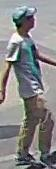

In [183]:
import random
test_dataset = dataset_dict['test']
attr_name = 'Hat'
attr_dataset = test_dataset.filter(lambda x: x[attr_name] == 1)

random_index = random.randint(0, len(attr_dataset))
image = attr_dataset[random_index]['image']
interpret_result(image, table_label_info, 'rap2')

In [214]:
BATCH_SIZE = 1024
import tqdm
def get_batch_tfresult(list_pil_image):
    assert model.training == False
    images = torch.stack([transform(img) for img in list_pil_image])
    with torch.no_grad():
        result = model.forward_default_test(
            input_var=EasyDict({
                "image": images.cuda(),
                "label": torch.Tensor([[0] * 168] * len(list_pil_image)).cuda(), # pseudo label for not causing error
            }),
            current_step=None,
        )
    cosine_logits = result['pred']['logit'] # use as probs
    probs = torch.nn.functional.sigmoid(cosine_logits)
    # tf_matrix = probs > threshold
    return probs.cpu().numpy()

list_result = []
for i in tqdm.tqdm(range(0, len(test_dataset), BATCH_SIZE)):
    list_pil_image = test_dataset[i:i+BATCH_SIZE]['image']
    list_result.extend(get_batch_tfresult(list_pil_image))

100%|████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.73s/it]


In [232]:
# table_label_info dump to table_label_info.txt
# %pip install prettytable
import prettytable

prettytable_info = prettytable.PrettyTable()
prettytable_info.field_names = table_label_info.columns
for index, row in table_label_info.iterrows():
    prettytable_info.add_row(row)
    
with open('table_label_info.txt', 'w') as f:
    f.write(str(prettytable_info))



In [201]:
table_label_info[table_label_info['dataset_name'] == 'PA_100k']

dataset_name  local_label_id  global_label_id            positive_meaning  \
54      PA_100k               0               54                  with a hat   
55      PA_100k               1               55                with glasses   
56      PA_100k               2               56          with short sleeves   
57      PA_100k               3               57           with long sleeves   
58      PA_100k               4               58   with stripe upper-clothes   
59      PA_100k               5               59     with logo upper-clothes   
60      PA_100k               6               60    with plaid upper-clothes   
61      PA_100k               7               61   with splice upper-clothes   
62      PA_100k               8               62   with stripe lower-clothes   
63      PA_100k               9               63  with pattern lower-clothes   
64      PA_100k              10               64              with long coat   
65      PA_100k              11               65          with long trousers   
66      PA_100k              12               66         with short trousers   
67      PA_100k              13               67         with skirt or dress   
68      PA_100k              14               68                  with boots   
69      PA_100k              15               69              with a handbag   
70      PA_100k              16               70         with a shoulder bag   
71      PA_100k              17               71             with a backpack   
72      PA_100k              18               72       hold objects in front   
73      PA_100k              19               73         age greater than 60   
74      PA_100k              20               74       age between 18 and 60   
75      PA_100k              21               75            age less than 18   
76      PA_100k              22               76                      female   
77      PA_100k              23               77       in the front position   
78      PA_100k              24               78        in the side position   
79      PA_100k              25               79        in the back position   

                       negative_meaning  
54                        without a hat  
55                      without glasses  
56                without short sleeves  
57                 without long sleeves  
58         without stripe upper-clothes  
59           without logo upper-clothes  
60          without plaid upper-clothes  
61         without splice upper-clothes  
62         without stripe lower-clothes  
63        without pattern lower-clothes  
64                    without long coat  
65                without long trousers  
66               without short trousers  
67               without skirt or dress  
68                        without boots  
69                    without a handbag  
70               without a shoulder bag  
71                   without a backpack  
72            not hold objects in front  
73         age less than or equal to 60  
74  age less than 18 or greater than 60  
75      age greater than or equal to 18  
76                                 male  
77            not in the front position  
78             not in the side position  
79             not in the back position

In [217]:
print(list(dataset_dict['test'].features.keys())[3:])

['Female', 'AgeOver60', 'Age18-60', 'AgeLess18', 'Front', 'Side', 'Back', 'Hat', 'Glasses', 'HandBag', 'ShoulderBag', 'Backpack', 'HoldObjectsInFront', 'ShortSleeve', 'LongSleeve', 'UpperStride', 'UpperLogo', 'UpperPlaid', 'UpperSplice', 'LowerStripe', 'LowerPattern', 'LongCoat', 'Trousers', 'Shorts', 'Skirt&Dress', 'boots']


In [228]:
import numpy as np
import sklearn.metrics

def get_report(list_result, attr_name_in_test_dataset, hulk_index_of_class, threshold=0.5):
    np_result = np.array(list_result) # 10000, 168
    pred_result = np_result[:, hulk_index_of_class] > threshold
    ground_true_hat = np.array([x[attr_name_in_test_dataset] for x in test_dataset])
    res = sklearn.metrics.classification_report(ground_true_hat, pred_result, output_dict=True)
    table_res = pd.DataFrame(res).transpose()
    display(table_res)
    
get_report(list_result, 'LongSleeve', 57, 0.5)

precision    recall  f1-score     support
0              0.920536  0.904243  0.912317   4407.0000
1              0.925586  0.938495  0.931996   5593.0000
accuracy       0.923400  0.923400  0.923400      0.9234
macro avg      0.923061  0.921369  0.922156  10000.0000
weighted avg   0.923361  0.923400  0.923323  10000.0000